In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/guha/Ecommerce.csv')

In [2]:
df.columns


Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Churned'],
      dtype='object')

In [3]:
def missing_values_table(df):
     
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)      
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [4]:
def plot_var(col_name, full_name, continuous):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
   
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    if continuous:
        sns.boxplot(x=col_name, y='Churned', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name)
    else:
        Charged_Off_rates = df.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate ' )
        ax2.set_xlabel(full_name)
    
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'Churned', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='Churned', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Churned               500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [6]:
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [7]:
df.sample(10)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
116,josesims@hunter.com,"8830 Debra Loaf Apt. 341Drakeville, ME 22340",SlateBlue,33.925795,12.011022,36.701052,2.753424,479.231093,No
163,johnsonpaul@keller-woodard.org,USCGC DodsonFPO AA 87781-3935,LimeGreen,30.879484,13.280432,36.936159,3.585161,490.206600,Yes
450,kiarakim@harris.org,"1502 Gonzalez ThroughwayKathrynchester, FM 860...",Linen,32.998388,10.946842,37.647808,3.826031,475.015407,No
409,johnsonchelsea@gmail.com,"19270 Velasquez CovesBoylechester, AZ 51480",LightCyan,32.088381,11.907844,35.189122,4.349778,512.165866,No
231,dominguezmaria@gmail.com,"1768 Rosales Ford Apt. 793Lake Markbury, SC 31567",RoyalBlue,34.173752,12.144749,37.258031,3.397363,512.552534,No
345,robertramirez@kaiser.com,"1583 Anderson CovesEast Rebecca, NH 27212",Purple,33.894640,10.610537,37.977389,3.537124,461.790959,No
427,randall85@williams.com,"5086 Morales Islands Apt. 099New Patricia, IL ...",Black,33.625307,12.988221,39.672591,3.969418,581.798798,No
195,mary84@edwards.com,"19123 Craig Isle Apt. 719Millsmouth, SC 94194",LightSkyBlue,31.820998,10.771074,37.278640,3.519032,424.675281,Yes
87,erik46@hotmail.com,20711 Martin Harbors Apt. 582New Justinborough...,LemonChiffon,34.447871,10.607724,36.819096,3.366464,473.728967,No
26,ijones@schaefer-carr.net,"657 Judith CrossroadHancockchester, VI 75658-5788",Linen,33.541231,12.783892,36.430650,4.648199,619.895640,No


In [9]:
df['Churned'][300]

'No'

In [10]:
df['Churned'] = df['Churned'].map(lambda x: x.strip())

In [11]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
251,halljohn@yahoo.com,"311 Savannah Ramp Suite 245Carlsonbury, LA 084...",MediumTurquoise,32.728521,10.131712,34.845612,3.287702,393.857371,Yes
178,victoria53@hotmail.com,"16329 Sara Neck Apt. 463Bryanside, TX 62329",Pink,32.635878,12.178573,35.674256,4.131755,537.773163,No
195,mary84@edwards.com,"19123 Craig Isle Apt. 719Millsmouth, SC 94194",LightSkyBlue,31.820998,10.771074,37.278640,3.519032,424.675281,Yes
271,beckycarson@jones-brown.biz,"78787 Mitchell LightsMatthewville, AZ 30310-0130",Gold,33.540479,12.884125,36.226042,5.007272,628.047804,No
363,tammy12@gmail.com,"78297 Brown Street Apt. 786East Taylorfurt, AK...",Chocolate,34.179518,12.581548,35.444265,3.137069,527.782996,No


In [12]:
df.Churned.value_counts(normalize=True)


No     0.688
Yes    0.312
Name: Churned, dtype: float64

In [24]:
df.groupby('Avg Session Length')['Churned'].value_counts(normalize=True).loc[:,'Yes']

Avg Session Length
29.532429    1.0
30.393185    1.0
30.492537    1.0
30.574364    1.0
30.816201    1.0
            ... 
34.558295    1.0
34.594021    1.0
34.606242    1.0
34.729080    1.0
35.037450    1.0
Name: Churned, Length: 156, dtype: float64

In [25]:
df.groupby('Churned').mean()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Churned,,,,,
No,33.206664,12.280996,37.076482,3.927033,537.006912
Yes,32.714772,11.548598,37.025083,2.665585,416.196420


In [26]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df.Churned == 'No',feature]
    dist2 = df.loc[df.Churned == 'Yes',feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')

In [27]:
ks_list = ['Email', 'Address', 'Avatar','Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

In [28]:
for ks_element in ks_list:
    run_KS_test(ks_element)

Email:
Ks_2sampResult(statistic=0.08117173524150269, pvalue=0.4501059092908297) 

Address:
Ks_2sampResult(statistic=0.07267441860465117, pvalue=0.5902101493010372) 

Avatar:
Ks_2sampResult(statistic=0.046735241502683364, pvalue=0.9621531856995452) 

Avg Session Length:
Ks_2sampResult(statistic=0.20781156827668457, pvalue=0.00015088444299382608) 

Time on App:
Ks_2sampResult(statistic=0.3597197376267144, pvalue=7.086553566182374e-13) 

Time on Website:
Ks_2sampResult(statistic=0.07170542635658915, pvalue=0.6071604772271393) 

Length of Membership:
Ks_2sampResult(statistic=0.5628354203935599, pvalue=9.992007221626409e-16) 

Yearly Amount Spent:
Ks_2sampResult(statistic=0.8473464519976148, pvalue=9.992007221626409e-16) 



In [29]:
ks_list = ['Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

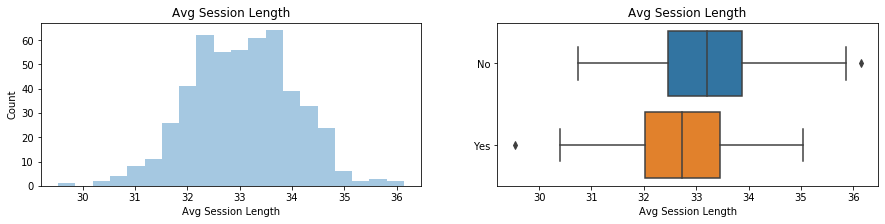

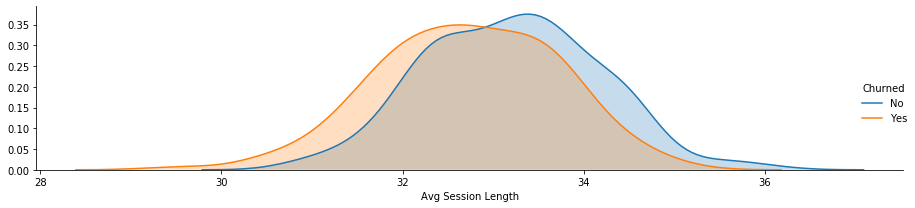

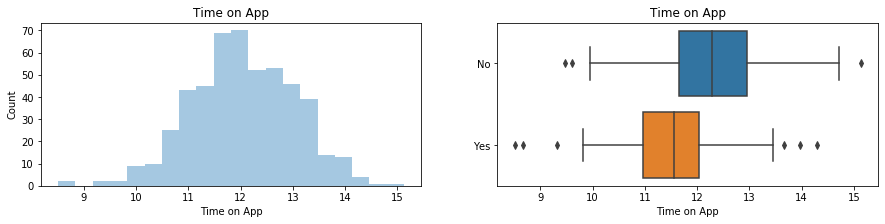

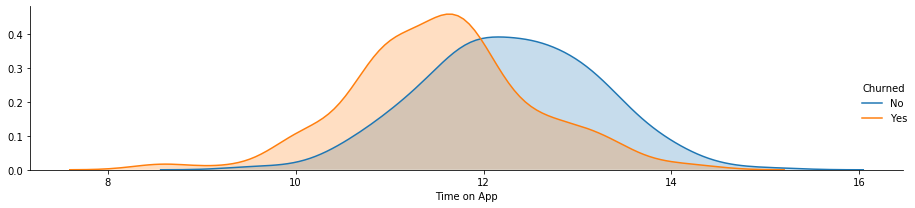

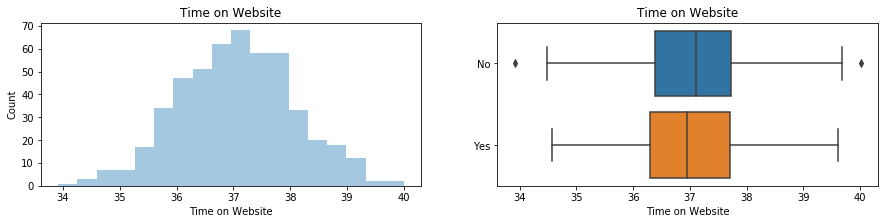

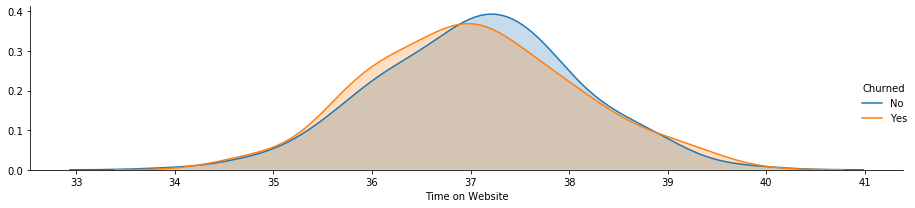

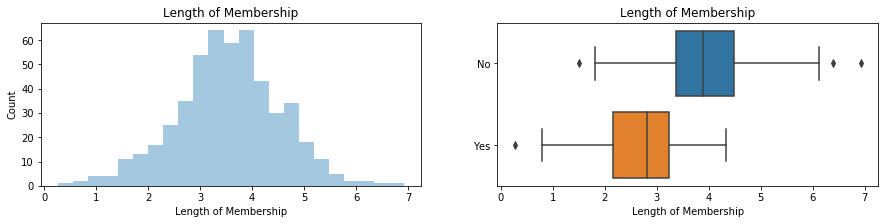

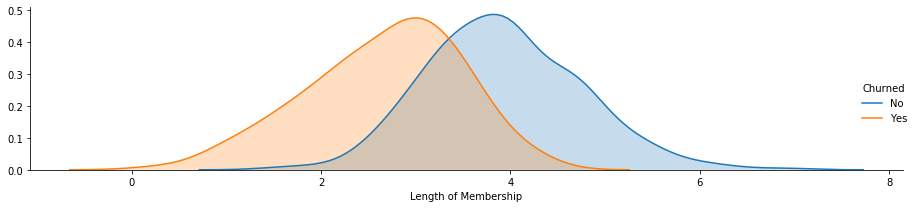

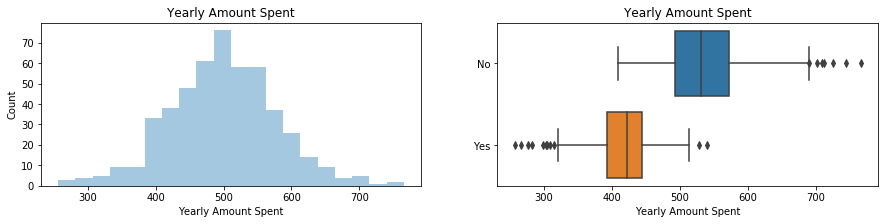

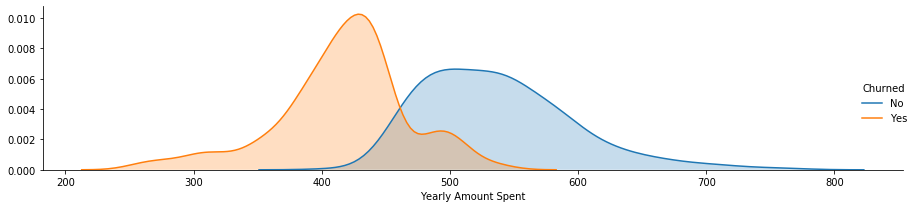

In [30]:
for plot_element in ks_list:
    plot_var(plot_element, plot_element, continuous=True)

In [31]:
#Linear Correlation
df.churned = df.Churned.map({'No':0, 'Yes':1})

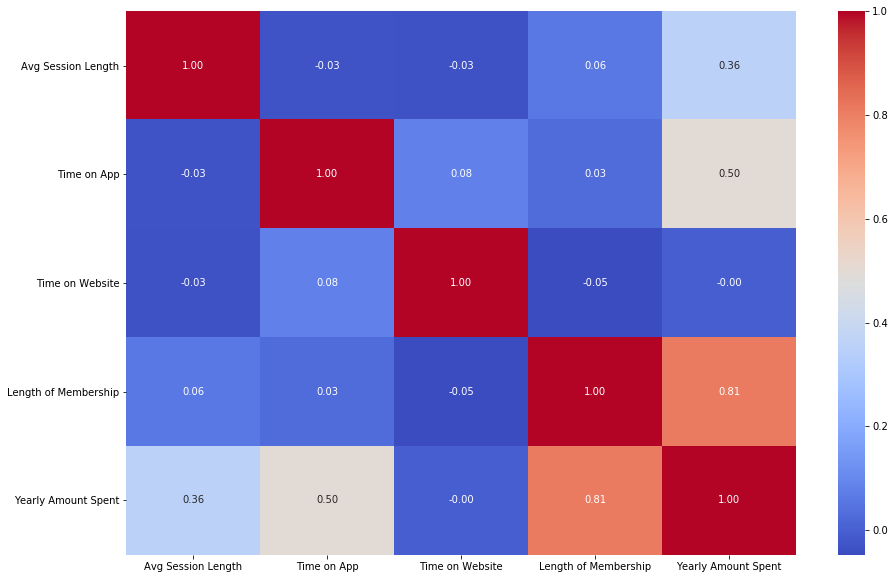

In [32]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [33]:
from scipy.stats import pearsonr
print(pearsonr(df['Yearly Amount Spent'],df['Length of Membership'])[0])

0.8090835682495683


In [34]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,No
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Yes
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,No
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,No
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,No


In [80]:
drop_list = ['Email','Address','Avatar','Churned']

In [81]:
X = df.drop(drop_list, axis=1)
y = df.Churned.values

In [82]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X.sample(5)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
258,33.247268,14.069382,38.993322,4.978476,660.425184
207,33.324241,11.084584,36.776017,4.746990,562.082045
71,34.335896,12.228935,36.157191,4.694322,595.822837
440,33.200616,11.965980,36.831536,3.549036,499.140152
194,33.459477,11.388613,37.909139,2.566640,434.021700


In [40]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 400 observations and 5 features
Unique target labels: ['No' 'Yes']


In [41]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

In [42]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

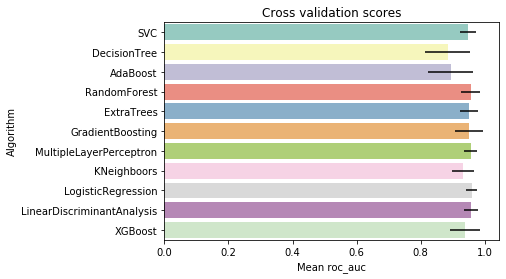

In [43]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")


In [44]:
### SVC classifier
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [45]:
svm_best = grid_svm.best_estimator_
# Best score
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9602113442113442
Best parameters set: 
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [46]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

In [47]:
### SVC classifier
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs

In [48]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9567955451955452
Best parameters set: 
 {'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}


In [49]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

In [50]:
### KNN classifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 16],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [51]:
knn_best = grid_knn.best_estimator_
# Best score
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.9516965034965036
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'distance'}


In [52]:
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

In [53]:
### Logistic Regression classifier

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.001     , 0.0010715...
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 

In [54]:
lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9610600362600363
Best parameters set: 
 {'C': 0.002137962089502232, 'penalty': 'l2'}


In [55]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

In [57]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) # If None, half of the features are selected.
rfe_l2.fit(X_train, y_train)
print("Logistic Regression (L2) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L2) RFE Result
Yearly Amount Spent: 1
Length of Membership: 2
Time on App: 3
Avg Session Length: 4
Time on Website: 5


In [58]:
# Gradient boosting tunning
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   46.6s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
   

In [59]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.9497109557109557
Best parameters set: 
 {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}


In [60]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

In [61]:
# XGboost tunning
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   38.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
              

In [62]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9582200466200467
Best parameters set: 
 {'learning_rate': 0.025, 'max_depth': 5, 'subsample': 0.25}


In [63]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [64]:
# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

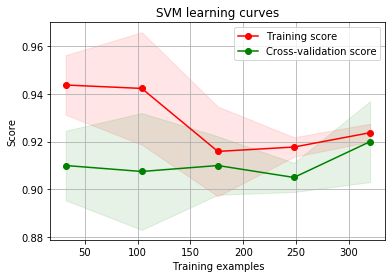

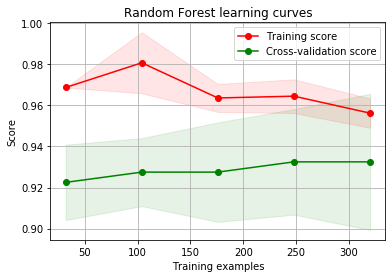

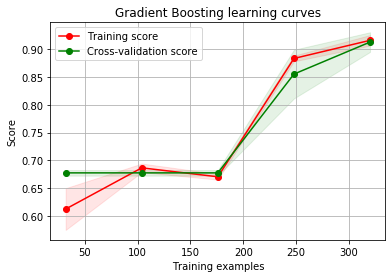

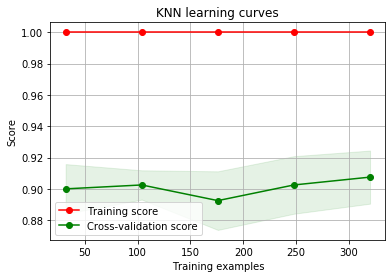

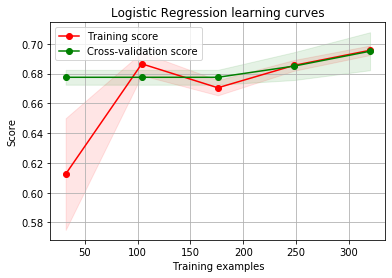

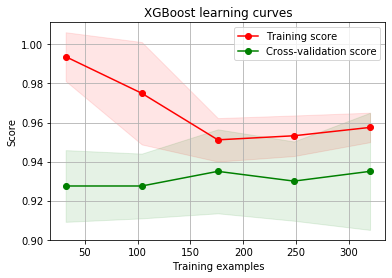

In [65]:
# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

In [66]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

['No' 'Yes']
Gradient Boosting
Accuracy is 0.96
Precision is 0.896551724137931
Recall is 0.9629629629629629
F1 score is 0.9285714285714286
ROC AUC is 0.9690512430238458


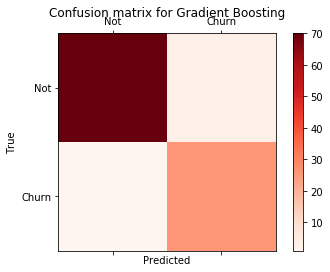

Logisitic Regression
Accuracy is 0.77
Precision is 1.0
Recall is 0.14814814814814814
F1 score is 0.25806451612903225
ROC AUC is 0.967529173008625


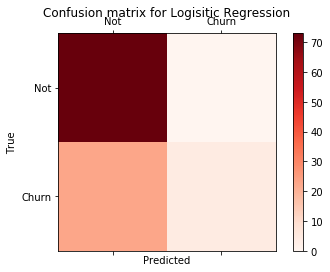

K-Nearest-Neighbors
Accuracy is 0.93
Precision is 0.8571428571428571
Recall is 0.8888888888888888
F1 score is 0.8727272727272727
ROC AUC is 0.9680365296803652


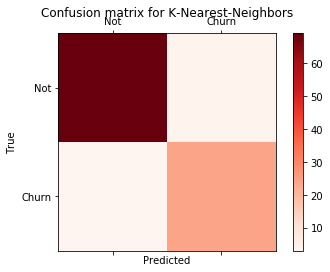

Random Forest
Accuracy is 0.96
Precision is 0.896551724137931
Recall is 0.9629629629629629
F1 score is 0.9285714285714286
ROC AUC is 0.9647387113140539


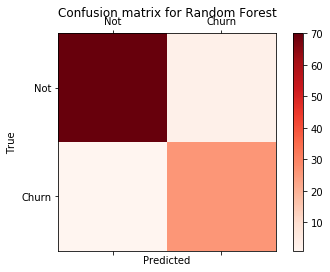

Support Vector Machine
Accuracy is 0.94
Precision is 0.8387096774193549
Recall is 0.9629629629629629
F1 score is 0.896551724137931
ROC AUC is 0.9644850329781837


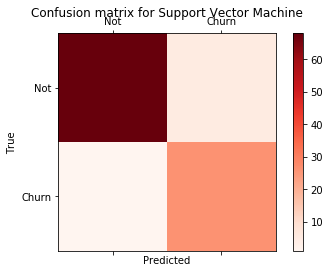

XGBoost Classifier
Accuracy is 0.95
Precision is 0.8666666666666667
Recall is 0.9629629629629629
F1 score is 0.912280701754386
ROC AUC is 0.9863013698630136


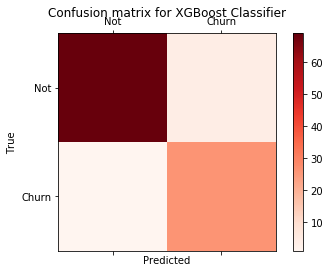

In [67]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

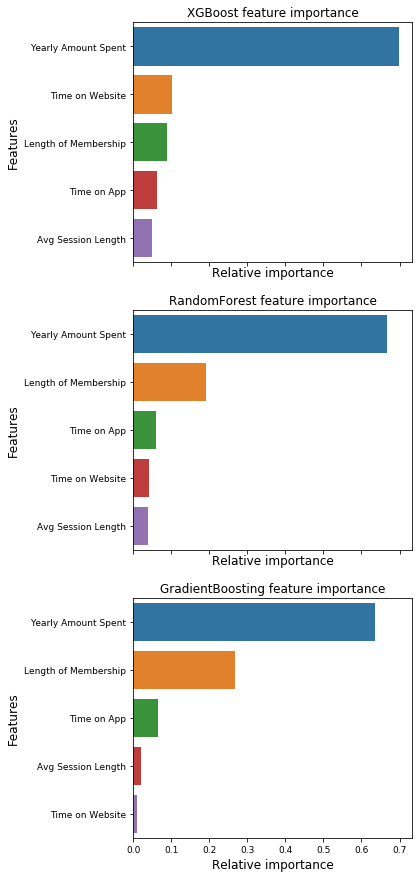

In [68]:
#nrows = ncols = 2
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best),("GradientBoosting",gb_best),("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [69]:
# Concatenate all classifier results

test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
test_knn = pd.Series(knn_best.predict(X_test), name="KNN")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")

frames=[test_rf, test_lr,test_gb,test_knn, test_svm, test_xgb]
#A_filter = pd.Series([frames])
ensemble_results = pd.concat(frames,axis=1)


In [70]:
ensemble_results


,Random Forest,Logistic Regression,Gradient Boosting,KNN,SVM,XGBoost
0,Yes,No,Yes,Yes,Yes,Yes
1,No,No,No,No,No,No
2,Yes,No,Yes,Yes,Yes,Yes
3,No,No,No,No,No,No
4,Yes,No,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...
95,No,No,No,No,No,No
96,No,No,No,No,No,No
97,No,No,No,No,No,No
98,Yes,No,Yes,Yes,Yes,Yes


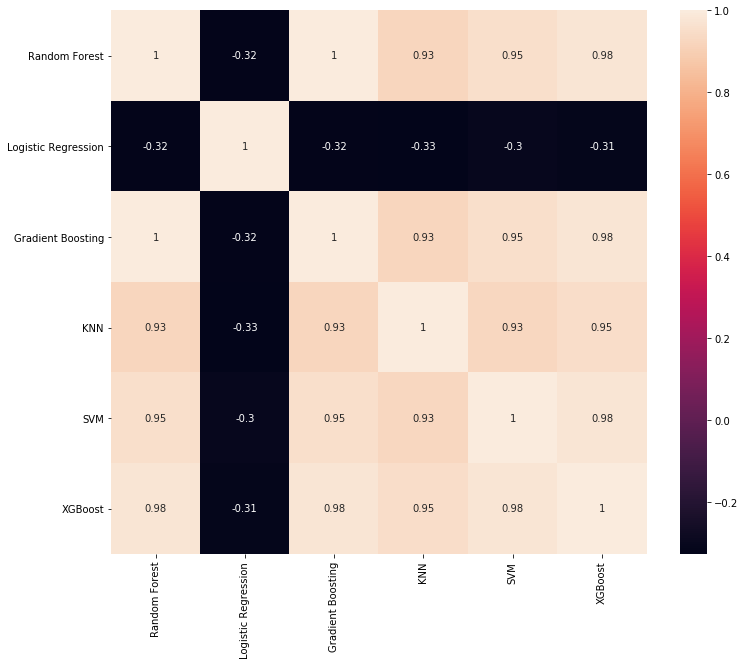

In [71]:
#plt.figure(figsize=(15,10)) 
#g = sns.heatmap(ensemble_results.corr(),)
#plt.show()

plt.figure(figsize=(12,10))
corr = ensemble_results.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, annot = True)

In [72]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [73]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.96
Precision is 0.896551724137931
Recall is 0.9629629629629629
F1 score is 0.9285714285714286
ROC AUC is 0.9690512430238457


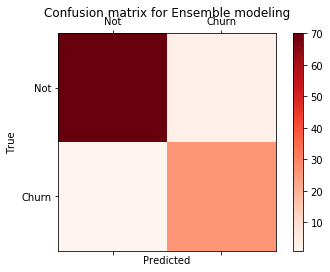

In [74]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)